### Import libraries

In [2]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

### Read datasets

How to read the dataset (.data and .names) directly in to Python DataFrame
https://stackoverflow.com/questions/62435218/how-to-read-the-dataset-data-and-names-directly-into-python-dataframe-from-u

Python Pandas Error tokenizing data
https://stackoverflow.com/questions/18039057/python-pandas-error-tokenizing-data   

In [21]:
# Without Column Names
Data = pd.read_excel('credit_card.xls'
                     , header=None).drop([0])

In [22]:
Data = Data.rename(columns=Data.iloc[0]).drop([1]).reset_index().drop(['index','ID'], axis=1)

In [23]:
Data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [27]:
Data = Data.rename(columns = {'default payment next month':'default'})

In [32]:
Data.to_csv('refined_dataset.csv')

In [35]:
Data = pd.read_csv('refined_dataset.csv').drop(['Unnamed: 0'], axis = 1)

### Sneak peak in to data sets.

In [36]:
Data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [37]:
Data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [65]:
Data.default.unique()

array([1, 0], dtype=int64)

In [38]:
Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_0      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

In [39]:
print(Data.isnull().sum()) 

LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_0        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
default      0
dtype: int64


In [ ]:
# Chart Analysis

In [ ]:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [ ]:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Train Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
X = Data.drop(['default'], axis  = 1)

y = Data['default']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Train Model   - Logistic Regression, Random Forest, SVM

## RandomForestClassifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
random_forest_model = RandomForestClassifier(max_depth=2, random_state=0)

In [46]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

Predict and Caulculate Accuracy Scores(Confusion Matrix)

In [47]:
y_predict = random_forest_model.predict(X_test)

In [59]:
from sklearn.metrics import plot_confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, accuracy_score

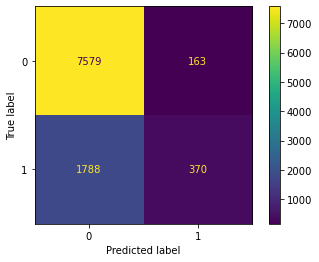

In [53]:
plot_confusion_matrix(random_forest_model ,X_test, y_test)

In [60]:
print(f1_score(y_test, y_predict))

0.2749907097733185


In [61]:
print(accuracy_score(y_test, y_predict))

0.8029292929292929


## LogisticRegression

In [92]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [93]:
X, y = load_iris(return_X_y=True)

In [101]:
clf = LogisticRegression(random_state=0).fit(X, y)

C:\Users\isuri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [96]:
clf.predict(X[:2, :])

array([0, 0])

In [97]:
clf.predict_proba(X[:2, :])

array([[9.81798885e-01, 1.82011004e-02, 1.43499227e-08],
       [9.71721788e-01, 2.82781823e-02, 3.00194617e-08]])

In [98]:
clf.score(X, y)

0.9733333333333334

## SVM

SVM
https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [111]:
 from sklearn import svm
from sklearn.pipeline import make_pipeline

In [112]:
 X = [[0, 0], [1, 1]]
 y = [0, 1]


In [113]:
 clf = svm.SVC()


In [114]:
 clf.fit(X, y)


SVC()

In [115]:
clf.clf_pipeline.fit(X, y)

AttributeError: 'SVC' object has no attribute 'clf_pipeline'

In [86]:
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [76]:
SVC = make_pipeline(StandardScaler())

In [90]:
SVC.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler())])

In [91]:
SVC.standardscale(X_train, y_train)

AttributeError: 'Pipeline' object has no attribute 'standardscale'

In [102]:
print(clf.predict([[-0.8, -1]]))

ValueError: X has 2 features per sample; expecting 4